# A frost cracking example code

In [61]:
import numpy as np
import matplotlib.pyplot as plt

We are interested modeling the diffusion of heat in to rock.
To do this we need to set some parameters about the rock and the climate.

In [62]:
###########################
### physical parameters ###
###########################
α = 0.001
MAT = 0.  # Mean Annual Air Temperature
Tₐ = 12   # half of the annual temperature variation
py = 365  # 365 days per year



Next, we need to define some of the numerical parameters that are needed to run the model.

In [63]:
##############
### set up ###
##############
time_pts = [1, 91, 183, 273] # Time points we are interested in (julian days of year)
depths = np.flip(np.arange(0, 2.01, 0.001)) # Depths that we want to examine
all_days = np.arange(1, 366) # Days that we are intested ing.
crack_rng = [-3, -8] # Range of temperature where most cracking occurs.


Finally, we need to define a function where the physics is included

In [64]:
def T(z, t):
    return MAT + Tₐ * 10**(-z * np.sqrt(np.pi / (α * py))) * np.cos((2 * np.pi * t / py +np.pi) - z * np.sqrt(np.pi / (α * py)))


Now, let make a plot of it.

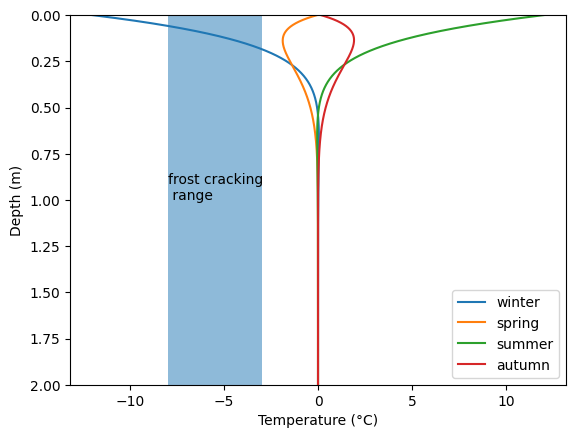

In [65]:
plt.figure("temperature plot")
plt.clf()

# Plot seasonal temperature variations
plt.plot(T(depths, time_pts[0]), depths, label="winter")
plt.plot(T(depths, time_pts[1]), depths, label="spring")
plt.plot(T(depths, time_pts[2]), depths, label="summer")
plt.plot(T(depths, time_pts[3]), depths, label="autumn")

# Highlight frost cracking range
plt.axvspan(crack_rng[1], crack_rng[0], alpha=0.5)
plt.text(crack_rng[1], 1, "frost cracking\n range")

plt.ylim([2, 0])
plt.xlabel("Temperature (°C)")
plt.ylabel("Depth (m)")
plt.legend()


Now you can play with some of the parameters. What happens when the temperature is 2 degress colder? or the annual temperature variation is half of the original value

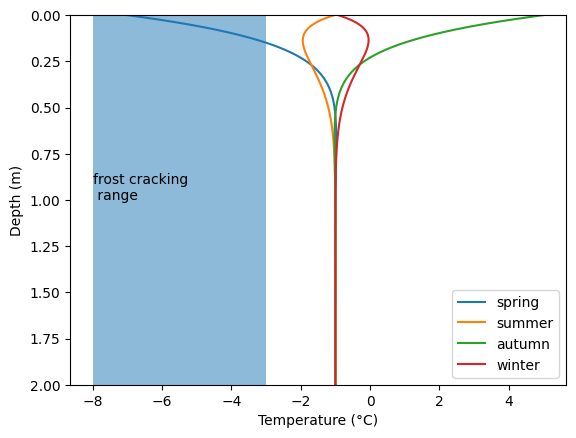

In [66]:
α = 0.001
MAT = -1  # Mean Annual Air Temperature
Tₐ = 12   # half of the annual temperature variation
Tₐ = 12/2   # half of the annual temperature variation


plt.figure("temperature plot")
plt.clf()

# Plot seasonal temperature variations
plt.plot(T(depths, time_pts[0]), depths, label="spring")
plt.plot(T(depths, time_pts[1]), depths, label="summer")
plt.plot(T(depths, time_pts[2]), depths, label="autumn")
plt.plot(T(depths, time_pts[3]), depths, label="winter")

# Highlight frost cracking range
plt.axvspan(crack_rng[1], crack_rng[0], alpha=0.5)
plt.text(crack_rng[1], 1, "frost cracking\n range")

plt.ylim([2, 0])
plt.xlabel("Temperature (°C)")
plt.ylabel("Depth (m)")
plt.legend()



Next we want to define how much frost cracking could occur over a year.

In [67]:
def frost_efficiency(depths):
  frost_crack_pot = np.zeros(365)
  for i in range(365):
    for j, depth in enumerate(depths):
        temp = T(depths[j], i + 1)
        if crack_rng[1] < temp < crack_rng[0]:
            frost_crack_pot[i] += (depths[1]-depths[2])

    return frost_crack_pot


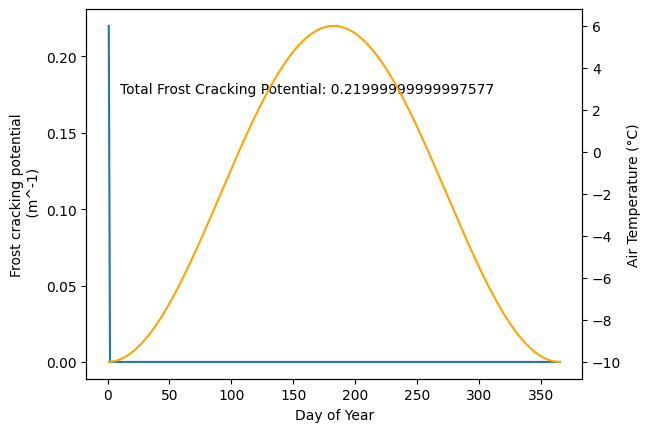

In [68]:
α = 0.001
MAT = -2 # Mean Annual Air Temperature
Tₐ = 8   # half of the annual temperature variation

frost_crack_pot =frost_efficiency(depths)

plt.figure("seasonal potential")
plt.clf()

# Plot frost cracking potential
plt.plot(all_days, frost_crack_pot)
plt.xlabel("Day of Year")
plt.ylabel("Frost cracking potential\n (m^-1)")
plt.text(10, 0.8 * np.max(frost_crack_pot), f"Total Frost Cracking Potential: {np.sum(frost_crack_pot)}")

# Plot air temperature on a secondary y-axis
ax2 = plt.twinx()
ax2.plot(all_days, T(0, all_days), color="orange")
ax2.set_ylabel("Air Temperature (°C)")

plt.show()